In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [20]:
import fcann2
import tf_logreg
import tf_deep
import data

# Fcann

iteration 0: loss 412.7671230896055
iteration 1000: loss 60.53976594780225
iteration 2000: loss 37.63398997899304
iteration 3000: loss 24.309120586407264
iteration 4000: loss 15.75892643364815
iteration 5000: loss 14.716066398242264
iteration 6000: loss 13.473415947014413
iteration 7000: loss 12.83138612125074
iteration 8000: loss 12.148217059900908
iteration 9000: loss 11.610160676696015


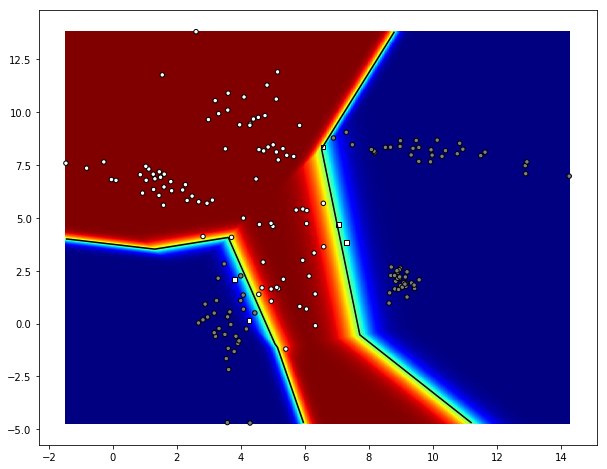

In [3]:
np.random.seed(100)

X, Y_ = data.sample_gmm_2d(6, 2, 30)

clf = fcann2.fcann2(H=5)

clf.fcann2_train(X, Y_)
dec_fun = lambda X: clf.fcann2_classify(X)[:,1]
probs = dec_fun(X)

Y = probs > 0.5
rect = (np.min(X, axis=0), np.max(X, axis=0))

figure(figsize=(10,8))
data.graph_surface(dec_fun, rect, offset=0.5)
data.graph_data(X, Y_, Y)

plt.show()

# Tensorflow linear regression

Instructions for updating:
Use `tf.global_variables_initializer` instead.


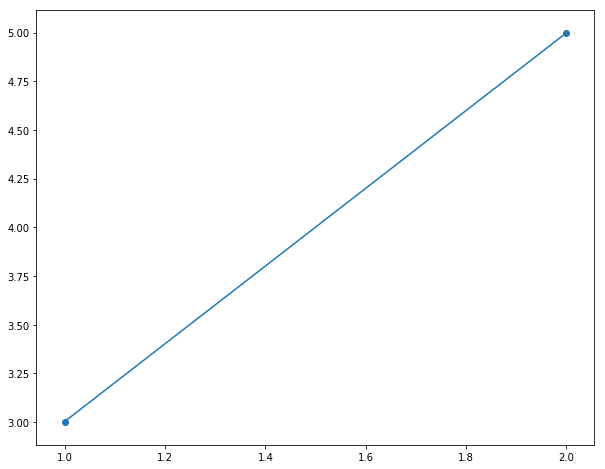

In [4]:
X = tf.placeholder(tf.float32, [None])
Y_ = tf.placeholder(tf.float32, [None])
a = tf.Variable(0.0)
b = tf.Variable(0.0)

Y = a * X + b

loss = (Y-Y_)**2

trainer = tf.train.GradientDescentOptimizer(0.1)
train_op = trainer.minimize(loss)

sess = tf.Session()
sess.run(tf.initialize_all_variables())

Xs = np.array([1, 2])
Ys = np.array([3, 5])


for i in range(100):
    val_loss, _, val_a, val_b = sess.run([loss, train_op, a, b],
        feed_dict={X: [1,2], Y_: [3,5]})
    #print(i, val_loss, val_a, val_b)

figure(figsize=(10,8))
plt.plot(Xs, val_a * Xs + val_b)
plt.scatter(Xs, Ys, marker='o')
plt.show()

# Tensorflow logistic regression

iteration 0: loss 1.210646152496338
iteration 100: loss 0.39019203186035156
iteration 200: loss 0.3198263943195343
iteration 300: loss 0.29152676463127136
iteration 400: loss 0.27633175253868103
iteration 500: loss 0.2667106091976166
iteration 600: loss 0.25996923446655273
iteration 700: loss 0.25492674112319946
iteration 800: loss 0.25098609924316406
iteration 900: loss 0.24781134724617004


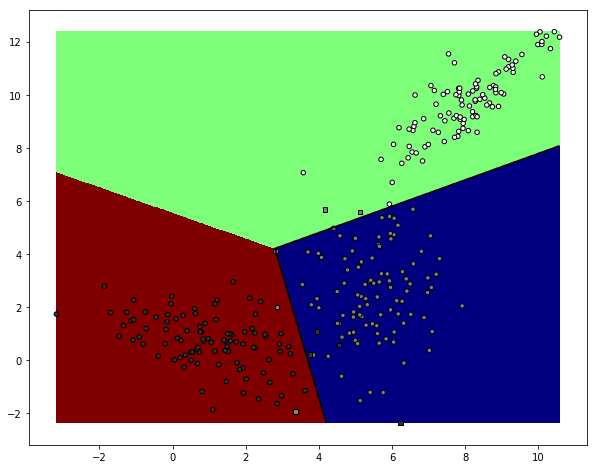

In [5]:
np.random.seed(100)
tf.set_random_seed(100)

X, Y_, Yoh_ = data.sample_gauss_2d(3, 100, one_hot=True)

_, D = X.shape
_, C = Yoh_.shape

tflr = tf_logreg.TFLogreg(D, C, 0.1)
tflr.train(X, Yoh_, 1000)

probs = tflr.eval(X)

Y = probs.argmax(axis=1)
dec_fun = lambda X: tflr.eval(X).argmax(axis=1)

rect = (np.min(X, axis=0), np.max(X, axis=0))

figure(figsize=(10,8))
data.graph_surface(dec_fun, rect)
data.graph_data(X, Y_, Y)
plt.show()


# Tensorflow duboki model

iteration 0: loss 1.568980097770691
iteration 100: loss 0.6038070917129517
iteration 200: loss 0.5762218832969666
iteration 300: loss 0.5465391278266907
iteration 400: loss 0.5271146893501282
iteration 500: loss 0.5091027617454529
iteration 600: loss 0.49158695340156555
iteration 700: loss 0.47423413395881653
iteration 800: loss 0.45655304193496704
iteration 900: loss 0.43822091817855835
iteration 1000: loss 0.4192388653755188
iteration 1100: loss 0.3996759355068207
iteration 1200: loss 0.3792382776737213
iteration 1300: loss 0.3593708276748657
iteration 1400: loss 0.34196749329566956
iteration 1500: loss 0.3262418210506439
iteration 1600: loss 0.31184321641921997
iteration 1700: loss 0.2985741198062897
iteration 1800: loss 0.28623321652412415
iteration 1900: loss 0.2746257185935974
iteration 2000: loss 0.26361051201820374
iteration 2100: loss 0.2531045973300934
iteration 2200: loss 0.2430688440799713
iteration 2300: loss 0.23349174857139587
iteration 2400: loss 0.2243770807981491
iter

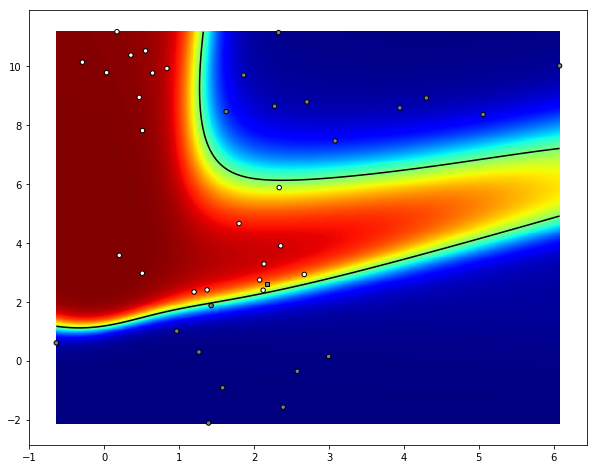

In [6]:
np.random.seed(42)
tf.set_random_seed(130)

X, Y_, Yoh_ = data.sample_gmm_2d(4, 2, 10, one_hot=True)

layers = [X.shape[1], 10, 10, Yoh_.shape[1]]
nn = tf_deep.TFDeep(layers, 0.05, 1e-4, activation=tf.sigmoid)
nn.train(X, Yoh_, 4000)

probs = nn.eval(X)
Y = probs.argmax(axis=1)

dec_fun = lambda X: nn.eval(X)[:,1]
rect = (np.min(X, axis=0), np.max(X, axis=0))
figure(figsize=(10,8))
data.graph_surface(dec_fun, rect)
data.graph_data(X, Y_, Y)
plt.show()

# MNIST

In [12]:
from tensorflow.examples.tutorials.mnist import input_data
#tf.app.flags.DEFINE_string('data_dir', '/tmp/data/', 'Directory for storing data')

In [15]:
#print(tf.app.flags.FLAGS.data_dir)
mnist = input_data.read_data_sets('/tmp/data/', one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


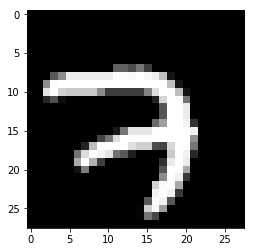

In [18]:
N = mnist.train.images.shape[0]
D = mnist.train.images.shape[1]
C = mnist.train.labels.shape[1]

plt.imshow(mnist.train.images[0].reshape(28,28), cmap='gray')

In [23]:
X, Yoh_ = mnist.train.images, mnist.train.labels

layers = [X.shape[1], Yoh_.shape[1]]
nn = tf_deep.TFDeep(layers, 0.5, 1e-8)
nn.train(X, Yoh_, 1000)

iteration 0: loss 13.031852722167969
iteration 100: loss 1.2609202861785889
iteration 200: loss 0.9169600605964661
iteration 300: loss 0.7809075117111206
iteration 400: loss 0.7028412818908691
iteration 500: loss 0.6501742005348206
iteration 600: loss 0.6113025546073914
iteration 700: loss 0.5809232592582703
iteration 800: loss 0.5562441349029541
iteration 900: loss 0.5356380343437195


In [25]:
Ys = nn.eval(mnist.test.images)

In [26]:
(Ys.argmax(1) == mnist.test.labels.argmax(1)).sum()/len(Ys)

0.8839